# Evaluate MQA performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'MQA'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
label_df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
label_df.head()

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0  model_1_ptm_seed_0_rec_10_ens_1    0.981   0.965   0.857        0.899   
1  model_1_ptm_seed_0_rec_10_ens_8    0.981   0.966   0.859        0.900   
2   model_1_ptm_seed_0_rec_1_ens_1    0.980   0.965   0.852        0.901   
3   model_1_ptm_seed_0_rec_1_ens_8    0.980   0.964   0.856        0.899   
4   model_1_ptm_seed_0_rec_2_ens_1    0.980   0.961   0.852        0.900   

   Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  Length      id  \
0      0.894  0.936     0.892      0.084  model_1_ptm  ...     235  7DW4_A   
1      0.895  0.937     0.893      0.054  model_1_ptm  ...     235  7DW4_A   
2      0.896  0.928     0.887     26.445  model_1_ptm  ...     235  7DW4_A   
3      0.895  0.928     0.887     26.413  model_1_ptm  ...     235  7DW4_A   
4      0.895  0.933     0.890      0.391  model_1_ptm  ...     235  7DW4_A   

   resolution           releasedate  \
0       1.570  2021-08-04T00:00:00Z   
1       1.570  2021-08-04T00:00:00Z   
2       1.570  2021-08-04T00:00:00Z   
3       1.570  2021-08-04T00:00:00Z   
4       1.570  2021-08-04T00:00:00Z   

                                              header  \
0  >7dw4_A mol:protein length:235  Glutathione S-...   
1  >7dw4_A mol:protein length:235  Glutathione S-...   
2  >7dw4_A mol:protein length:235  Glutathione S-...   
3  >7dw4_A mol:protein length:235  Glutathione S-...   
4  >7dw4_A mol:protein length:235  Glutathione S-...   

                                            sequence  length  \
0  HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
1  HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
2  HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
3  HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
4  HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   

  num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude is_similar_AF2  
0                   89                                   13           True  
1                   89                                   13           True  
2                   89                                   13           True  
3                   89                                   13           True  
4                   89                                   13           True  

[5 rows x 26 columns]

In [4]:
for i, csv in enumerate(sorted(score_dir.glob('*.csv'))):
    if csv.stem == 'label':
        continue
    if i == 0:
        mqa_df = pd.read_csv(csv, index_col=0)
    else:
        mqa_df = pd.merge(mqa_df, pd.read_csv(csv, index_col=0), on=['Model', 'Target'], how='outer')
mqa_df['DOPE'] = - mqa_df['DOPE']
mqa_df['SOAP'] = - mqa_df['SOAP']
mqa_df

Model      DOPE       SOAP  Target  \
0      model_1_ptm_seed_0_rec_10_ens_1 29608.344 116971.344  7DW4_A   
1      model_1_ptm_seed_0_rec_10_ens_8 29653.650 117449.914  7DW4_A   
2       model_1_ptm_seed_0_rec_1_ens_1 29679.896 118798.586  7DW4_A   
3       model_1_ptm_seed_0_rec_1_ens_8 29701.287 117463.500  7DW4_A   
4       model_1_ptm_seed_0_rec_2_ens_1 29673.592 118283.023  7DW4_A   
...                                ...       ...        ...     ...   
36995       model_5_seed_1_rec_5_ens_1 50310.906 236079.938  7BUJ_A   
36996       model_5_seed_1_rec_6_ens_1 50288.656 236481.766  7BUJ_A   
36997       model_5_seed_1_rec_7_ens_1 50336.586 237071.953  7BUJ_A   
36998       model_5_seed_1_rec_8_ens_1 50340.195 236660.281  7BUJ_A   
36999       model_5_seed_1_rec_9_ens_1 50324.348 236682.062  7BUJ_A   

       DeepAccNet  DeepAccNet-Bert  P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0           0.977            0.981   0.941   0.660        0.690       0.922   
1           0.978            0.981   0.941   0.664        0.691       0.924   
2           0.975            0.971   0.939   0.621        0.658       0.906   
3           0.973            0.971   0.939   0.625        0.677       0.910   
4           0.976            0.971   0.941   0.667        0.697       0.922   
...           ...              ...     ...     ...          ...         ...   
36995       0.779            0.901   0.771   0.610        0.566       0.776   
36996       0.774            0.893   0.773   0.631        0.582       0.787   
36997       0.778            0.889   0.771   0.639        0.586       0.787   
36998       0.785            0.884   0.772   0.629        0.578       0.784   
36999       0.775            0.885   0.768   0.621        0.572       0.777   

       ProQ3D  SBROD  VoroCNN  
0       0.795  1.561    0.679  
1       0.798  1.563    0.679  
2       0.763  1.560    0.680  
3       0.770  1.561    0.679  
4       0.804  1.562    0.677  
...       ...    ...      ...  
36995   0.703  1.912    0.584  
36996   0.715  1.916    0.583  
36997   0.717  1.915    0.585  
36998   0.709  1.921    0.586  
36999   0.707  1.913    0.584  

[37000 rows x 13 columns]

In [5]:
df = pd.merge(label_df, mqa_df, on=['Target', 'Model'], how='left')
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0      model_1_ptm_seed_0_rec_10_ens_1    0.981   0.965   0.857        0.899   
1      model_1_ptm_seed_0_rec_10_ens_8    0.981   0.966   0.859        0.900   
2       model_1_ptm_seed_0_rec_1_ens_1    0.980   0.965   0.852        0.901   
3       model_1_ptm_seed_0_rec_1_ens_8    0.980   0.964   0.856        0.899   
4       model_1_ptm_seed_0_rec_2_ens_1    0.980   0.961   0.852        0.900   
...                                ...      ...     ...     ...          ...   
36995       model_5_seed_1_rec_5_ens_1    0.966   0.900   0.735        0.835   
36996       model_5_seed_1_rec_6_ens_1    0.965   0.902   0.737        0.835   
36997       model_5_seed_1_rec_7_ens_1    0.965   0.901   0.735        0.835   
36998       model_5_seed_1_rec_8_ens_1    0.965   0.897   0.732        0.835   
36999       model_5_seed_1_rec_9_ens_1    0.965   0.895   0.727        0.834   

       Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...       SOAP  \
0          0.894  0.936     0.892      0.084  model_1_ptm  ... 116971.344   
1          0.895  0.937     0.893      0.054  model_1_ptm  ... 117449.914   
2          0.896  0.928     0.887     26.445  model_1_ptm  ... 118798.586   
3          0.895  0.928     0.887     26.413  model_1_ptm  ... 117463.500   
4          0.895  0.933     0.890      0.391  model_1_ptm  ... 118283.023   
...          ...    ...       ...        ...          ...  ...        ...   
36995      0.823  0.784       NaN      0.917      model_5  ... 236079.938   
36996      0.824  0.784       NaN      1.534      model_5  ... 236481.766   
36997      0.824  0.785       NaN      1.668      model_5  ... 237071.953   
36998      0.823  0.785       NaN      1.460      model_5  ... 236660.281   
36999      0.823  0.782       NaN      0.667      model_5  ... 236682.062   

       DeepAccNet  DeepAccNet-Bert P3CMQA  ProQ2D  ProQRosCenD  ProQRosFAD  \
0           0.977            0.981  0.941   0.660        0.690       0.922   
1           0.978            0.981  0.941   0.664        0.691       0.924   
2           0.975            0.971  0.939   0.621        0.658       0.906   
3           0.973            0.971  0.939   0.625        0.677       0.910   
4           0.976            0.971  0.941   0.667        0.697       0.922   
...           ...              ...    ...     ...          ...         ...   
36995       0.779            0.901  0.771   0.610        0.566       0.776   
36996       0.774            0.893  0.773   0.631        0.582       0.787   
36997       0.778            0.889  0.771   0.639        0.586       0.787   
36998       0.785            0.884  0.772   0.629        0.578       0.784   
36999       0.775            0.885  0.768   0.621        0.572       0.777   

      ProQ3D  SBROD VoroCNN  
0      0.795  1.561   0.679  
1      0.798  1.563   0.679  
2      0.763  1.560   0.680  
3      0.770  1.561   0.679  
4      0.804  1.562   0.677  
...      ...    ...     ...  
36995  0.703  1.912   0.584  
36996  0.715  1.916   0.583  
36997  0.717  1.915   0.585  
36998  0.709  1.921   0.586  
36999  0.707  1.913   0.584  

[37000 rows x 37 columns]

In [6]:
import sys
sys.path.append('../../../../mqa')
from eval import eval, stat_test

In [7]:
mqa_df.columns

Index(['Model', 'DOPE', 'SOAP', 'Target', 'DeepAccNet', 'DeepAccNet-Bert',
       'P3CMQA', 'ProQ2D', 'ProQRosCenD', 'ProQRosFAD', 'ProQ3D', 'SBROD',
       'VoroCNN'],
      dtype='object')

In [8]:
# Against gdtts
mqa_methods = ['DOPE', 'SOAP', 'ProQ3D', 'SBROD', 'VoroCNN', 'P3CMQA', 'DeepAccNet', 'DeepAccNet-Bert']
methods = mqa_methods + ['pLDDT', 'pTMscore']
label = 'GDT_TS'
data = df
result_df = eval(data, methods, label_name=label)
random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
result_df

100


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0              DOPE           0.116            0.098        2.770         NaN
1              SOAP           0.127            0.111        2.638         NaN
2            ProQ3D          -0.042           -0.057        3.269       0.215
3             SBROD          -0.017           -0.017        3.108         NaN
4           VoroCNN           0.069            0.062        2.409       0.265
5            P3CMQA           0.065            0.056        3.171       0.133
6        DeepAccNet           0.142            0.108        2.468       0.075
7   DeepAccNet-Bert           0.104            0.097        2.485       0.086
8             pLDDT           0.232            0.198        1.772       0.063
9          pTMscore           0.178            0.180        1.664       0.088
10  Random seletion             NaN              NaN        2.714         NaN

In [9]:
# Against gdtts (For targets whose value difference between max and min is larger than 0.05)
label = 'GDT_TS'
data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > 0.05)
result_df = eval(data, methods, label_name=label)
random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
result_df

34


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0              DOPE           0.171            0.130        5.978         NaN
1              SOAP           0.174            0.153        5.830         NaN
2            ProQ3D          -0.021           -0.047        7.124       0.225
3             SBROD          -0.011            0.006        6.906         NaN
4           VoroCNN           0.128            0.128        4.711       0.232
5            P3CMQA           0.075            0.073        7.199       0.172
6        DeepAccNet           0.262            0.205        5.398       0.117
7   DeepAccNet-Bert           0.177            0.163        5.319       0.127
8             pLDDT           0.335            0.286        3.416       0.097
9          pTMscore           0.275            0.265        2.882       0.095
10  Random seletion             NaN              NaN        5.886         NaN

In [10]:
# Against gdtts
label = 'GDT_TS'
for name, group in df.groupby('is_similar_AF2'):
    print(name)
    data = group
    result_df = eval(data, methods, label_name=label)
    random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
    result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
    display(result_df)

False
50


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0              DOPE           0.143            0.124        3.126         NaN
1              SOAP           0.113            0.099        3.000         NaN
2            ProQ3D          -0.071           -0.071        4.402       0.230
3             SBROD          -0.007           -0.017        3.059         NaN
4           VoroCNN           0.078            0.074        2.332       0.263
5            P3CMQA           0.021            0.001        3.816       0.157
6        DeepAccNet           0.168            0.139        2.582       0.080
7   DeepAccNet-Bert           0.137            0.140        2.730       0.092
8             pLDDT           0.263            0.236        1.327       0.064
9          pTMscore           0.241            0.259        1.553       0.081
10  Random seletion             NaN              NaN        2.922         NaN

True
50


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0              DOPE           0.090            0.073        2.414         NaN
1              SOAP           0.141            0.123        2.277         NaN
2            ProQ3D          -0.016           -0.045        2.227       0.202
3             SBROD          -0.028           -0.018        3.156         NaN
4           VoroCNN           0.059            0.050        2.486       0.267
5            P3CMQA           0.110            0.110        2.525       0.109
6        DeepAccNet           0.116            0.077        2.354       0.071
7   DeepAccNet-Bert           0.071            0.053        2.239       0.081
8             pLDDT           0.202            0.160        2.217       0.063
9          pTMscore           0.115            0.101        1.775       0.095
10  Random seletion             NaN              NaN        2.506         NaN

In [11]:
# Against gdtts (For targets whose value difference between max and min is larger than 0.05)
label = 'GDT_TS'
for name, group in df.groupby('is_similar_AF2'):
    print(name)
    data = group.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > 0.05)
    result_df = eval(data, methods, label_name=label)
    random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
    result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
    display(result_df)

False
17


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0              DOPE           0.251            0.207        7.083         NaN
1              SOAP           0.177            0.182        6.975         NaN
2            ProQ3D          -0.129           -0.111       10.339       0.264
3             SBROD           0.034            0.026        6.952         NaN
4           VoroCNN           0.178            0.182        4.657       0.231
5            P3CMQA           0.011            0.007        8.856       0.186
6        DeepAccNet           0.322            0.280        5.857       0.123
7   DeepAccNet-Bert           0.238            0.235        6.168       0.130
8             pLDDT           0.445            0.401        2.195       0.097
9          pTMscore           0.398            0.422        2.678       0.076
10  Random seletion             NaN              NaN        6.576         NaN

True
17


Method  GDT_TS Pearson  GDT_TS Spearman  GDT_TS Loss  GDT_TS MAE
0              DOPE           0.090            0.053        4.873         NaN
1              SOAP           0.171            0.124        4.686         NaN
2            ProQ3D           0.082            0.013        4.098       0.188
3             SBROD          -0.056           -0.014        6.859         NaN
4           VoroCNN           0.077            0.075        4.765       0.233
5            P3CMQA           0.139            0.138        5.541       0.157
6        DeepAccNet           0.201            0.130        4.939       0.111
7   DeepAccNet-Bert           0.115            0.092        4.469       0.124
8             pLDDT           0.226            0.171        4.636       0.096
9          pTMscore           0.151            0.108        3.086       0.115
10  Random seletion             NaN              NaN        5.195         NaN

In [12]:
# Against mean lddt
label = 'Mean_LDDT'
data = df
random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean()
result_df = eval(data, methods, label_name=label)
random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
result_df

97


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0              DOPE              0.268               0.248           1.060   
1              SOAP              0.230               0.211           1.219   
2            ProQ3D             -0.015              -0.030           1.547   
3             SBROD             -0.024              -0.043           1.662   
4           VoroCNN              0.121               0.106           1.288   
5            P3CMQA              0.109               0.103           1.417   
6        DeepAccNet              0.212               0.174           1.210   
7   DeepAccNet-Bert              0.165               0.145           1.101   
8             pLDDT              0.345               0.313           0.890   
9          pTMscore              0.283               0.266           0.997   
10  Random seletion                NaN                 NaN           1.360   

    Mean_LDDT MAE  
0             NaN  
1             NaN  
2           0.171  
3             NaN  
4           0.226  
5           0.105  
6           0.071  
7           0.081  
8           0.043  
9           0.057  
10            NaN

In [13]:
# Against mean lddt (For targets whose value difference between max and min is larger than 0.05)
label = 'Mean_LDDT'
random_loss = df.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean()
data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > 0.05)
result_df = eval(data, methods, label_name=label)
random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
result_df

18


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0              DOPE              0.521               0.462           2.068   
1              SOAP              0.436               0.414           2.724   
2            ProQ3D              0.187               0.140           3.252   
3             SBROD              0.109               0.091           4.067   
4           VoroCNN              0.290               0.264           2.202   
5            P3CMQA              0.277               0.226           3.287   
6        DeepAccNet              0.560               0.465           2.475   
7   DeepAccNet-Bert              0.390               0.379           2.108   
8             pLDDT              0.664               0.547           1.124   
9          pTMscore              0.514               0.485           1.734   
10  Random seletion                NaN                 NaN           3.071   

    Mean_LDDT MAE  
0             NaN  
1             NaN  
2           0.218  
3             NaN  
4           0.220  
5           0.162  
6           0.080  
7           0.097  
8           0.043  
9           0.084  
10            NaN

In [14]:
# Against mean LDDT
label = 'Mean_LDDT'
for name, group in df.groupby('is_similar_AF2'):
    print(name)
    data = group
    result_df = eval(data, methods, label_name=label)
    random_loss = data.groupby('Target').apply(lambda x: x[label].max() - x[label].mean()).mean() * 100
    result_df = result_df.append({'Method': 'Random seletion', f'{label} Loss': random_loss}, ignore_index=True)
    display(result_df)

False
49


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0              DOPE              0.273               0.259           1.149   
1              SOAP              0.208               0.193           1.229   
2            ProQ3D             -0.053              -0.064           1.712   
3             SBROD             -0.001              -0.029           1.604   
4           VoroCNN              0.172               0.144           1.305   
5            P3CMQA              0.045               0.042           1.837   
6        DeepAccNet              0.223               0.190           1.374   
7   DeepAccNet-Bert              0.185               0.176           1.257   
8             pLDDT              0.373               0.355           0.845   
9          pTMscore              0.306               0.303           0.962   
10  Random seletion                NaN                 NaN           1.415   

    Mean_LDDT MAE  
0             NaN  
1             NaN  
2           0.185  
3             NaN  
4           0.230  
5           0.125  
6           0.073  
7           0.085  
8           0.042  
9           0.053  
10            NaN

True
48


Method  Mean_LDDT Pearson  Mean_LDDT Spearman  Mean_LDDT Loss  \
0              DOPE              0.263               0.237           0.968   
1              SOAP              0.252               0.230           1.208   
2            ProQ3D              0.018               0.001           1.393   
3             SBROD             -0.047              -0.057           1.722   
4           VoroCNN              0.068               0.067           1.272   
5            P3CMQA              0.175               0.166           0.988   
6        DeepAccNet              0.201               0.156           1.043   
7   DeepAccNet-Bert              0.144               0.113           0.941   
8             pLDDT              0.315               0.270           0.935   
9          pTMscore              0.260               0.228           1.032   
10  Random seletion                NaN                 NaN           1.304   

    Mean_LDDT MAE  
0             NaN  
1             NaN  
2           0.157  
3             NaN  
4           0.223  
5           0.085  
6           0.068  
7           0.078  
8           0.044  
9           0.060  
10            NaN

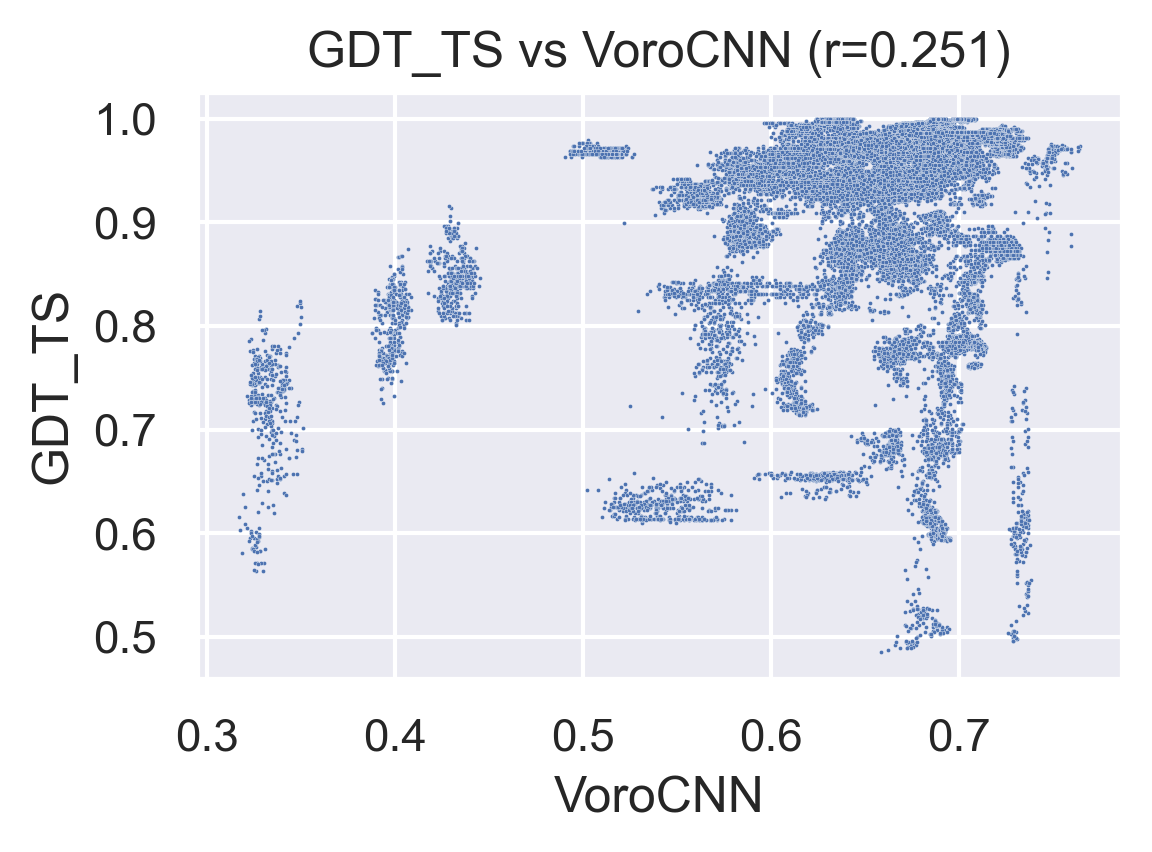

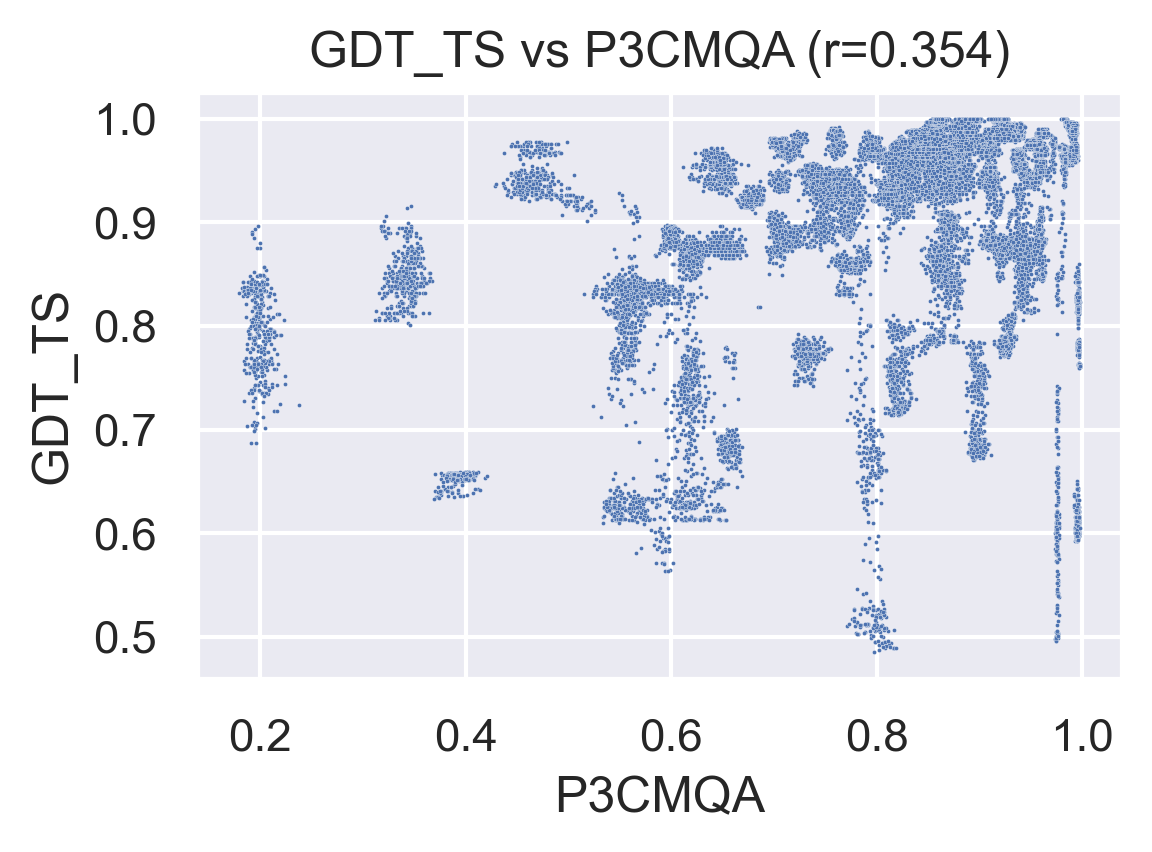

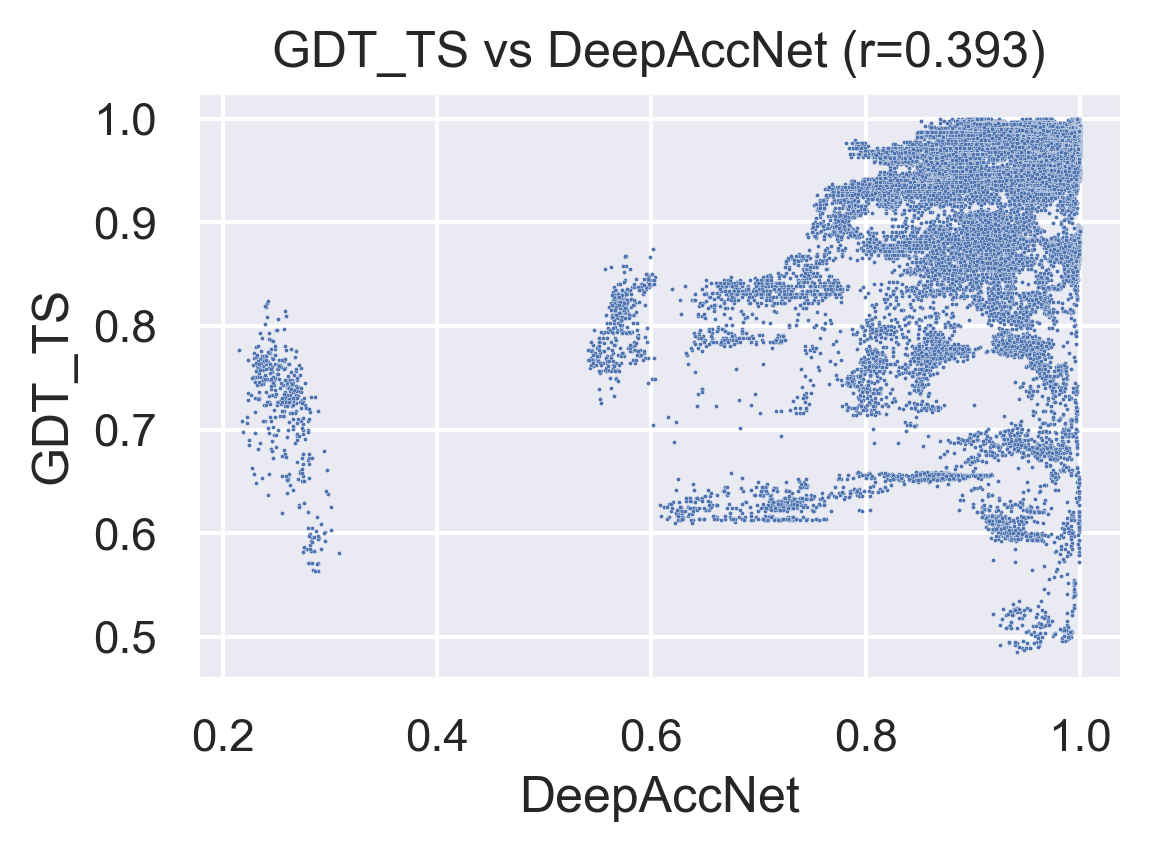

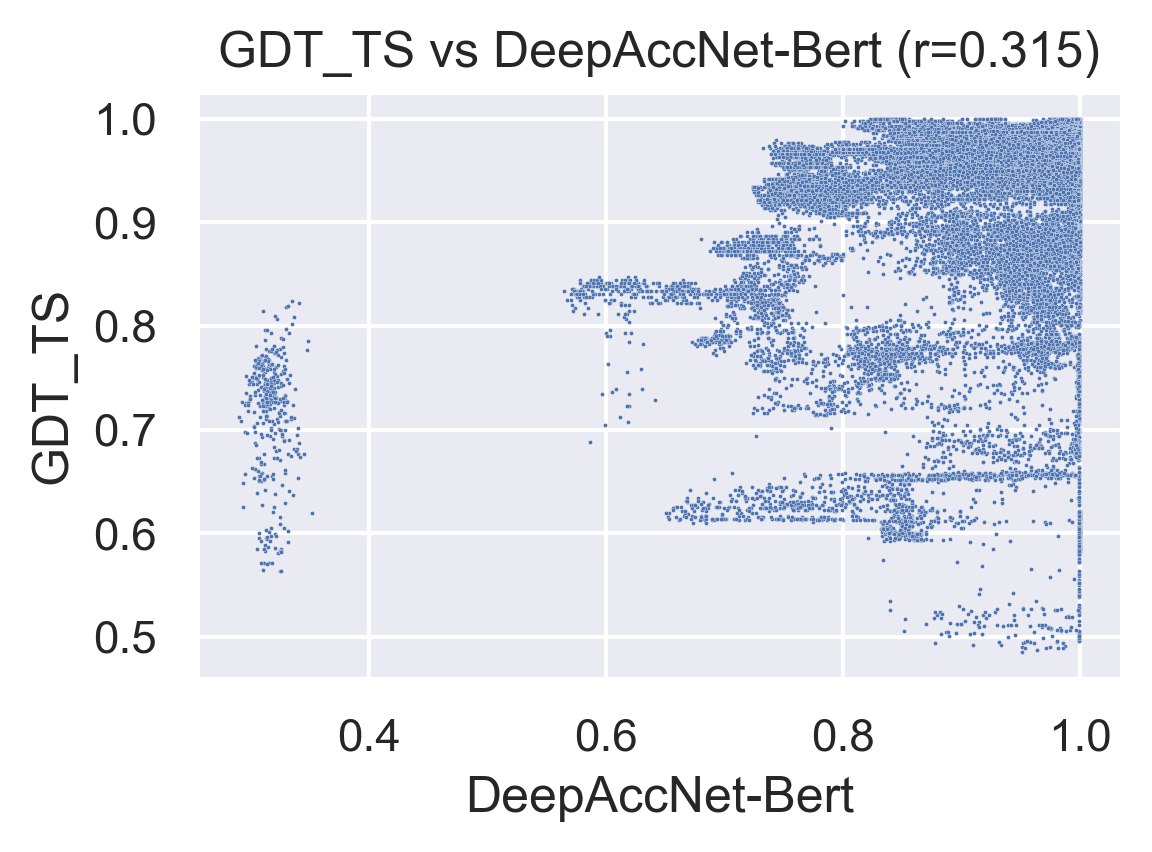

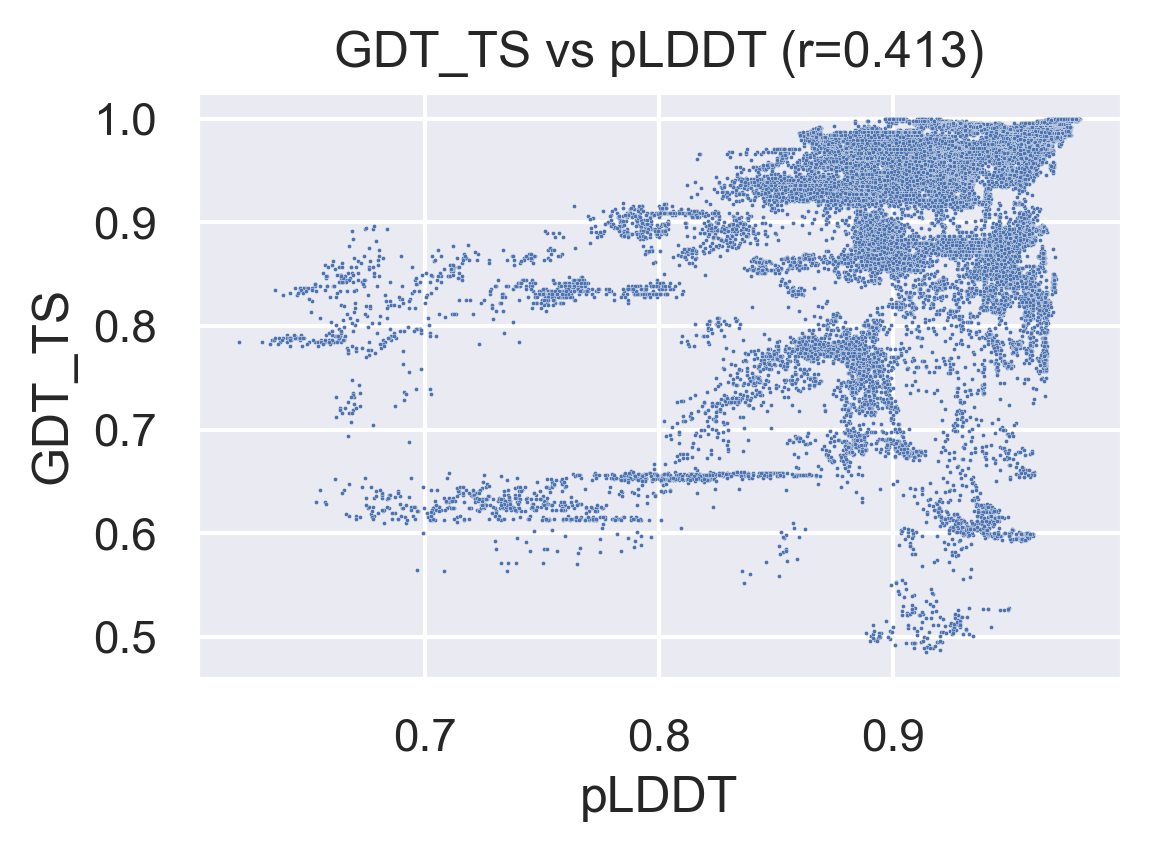

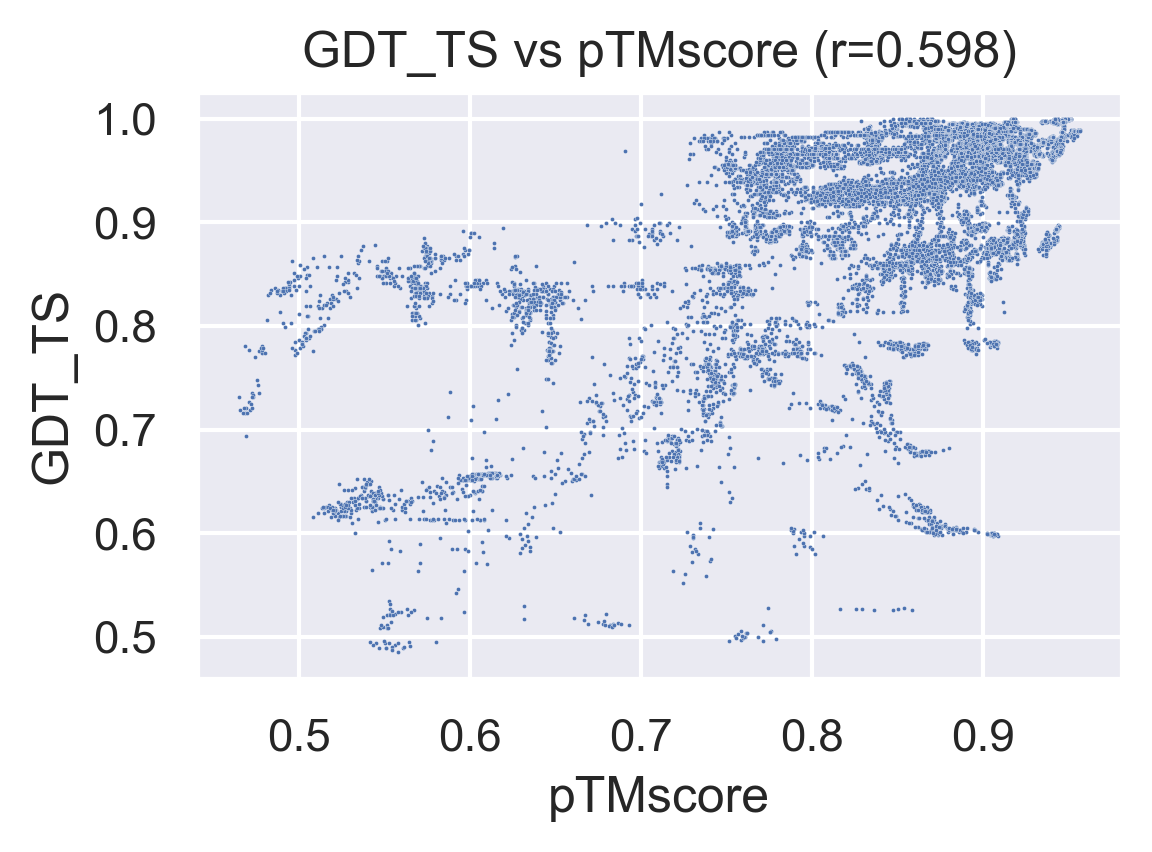

In [15]:
label = 'GDT_TS'
for method in methods:
    if method in ['DOPE', 'SOAP', 'SBROD']:
        continue
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=df, x=method, y=label, s=1)
    cc = df.corr()[label][method]
    plt.title(f'{label} vs {method} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

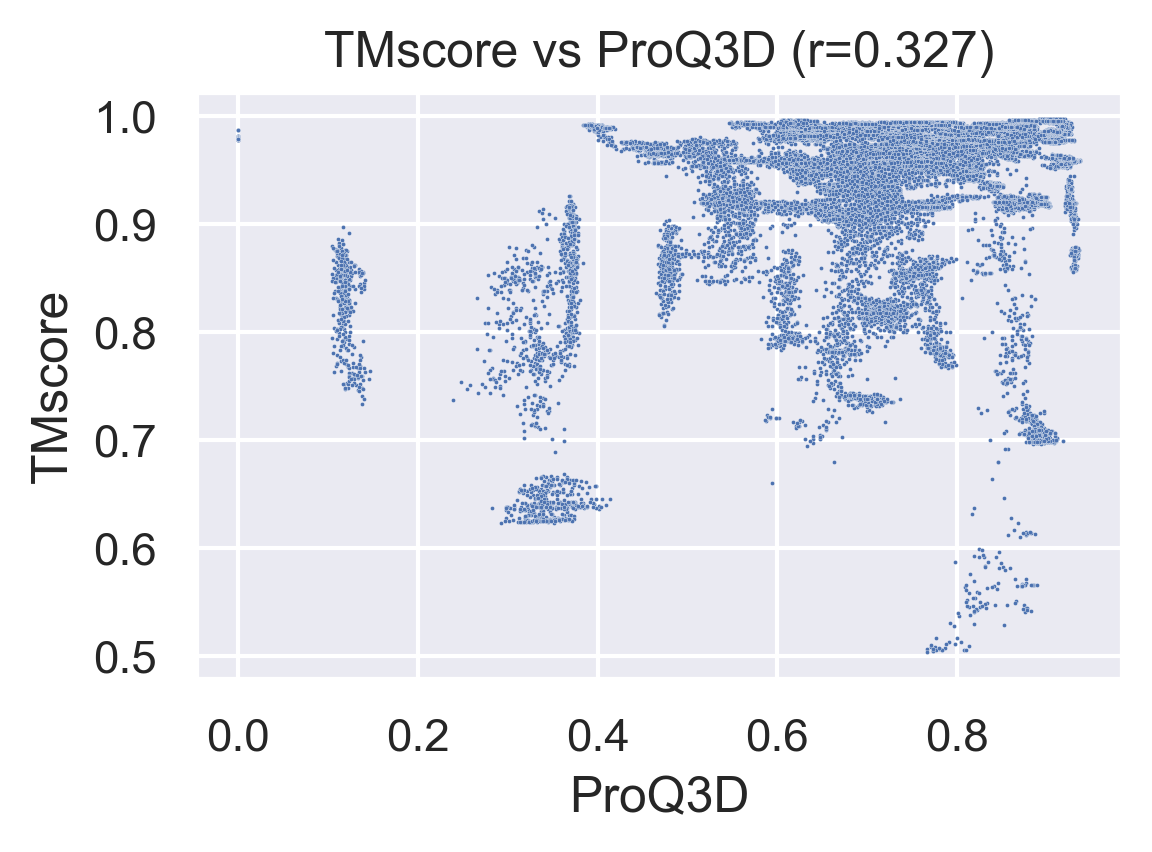

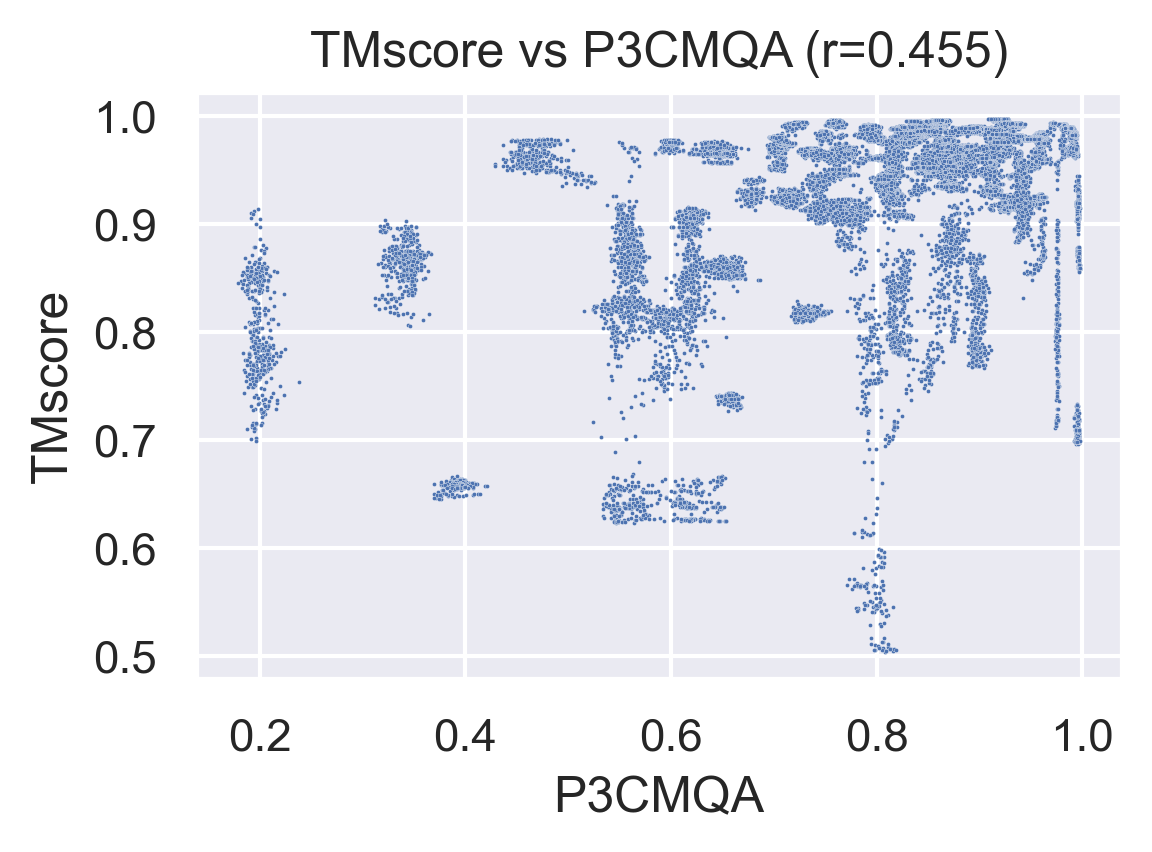

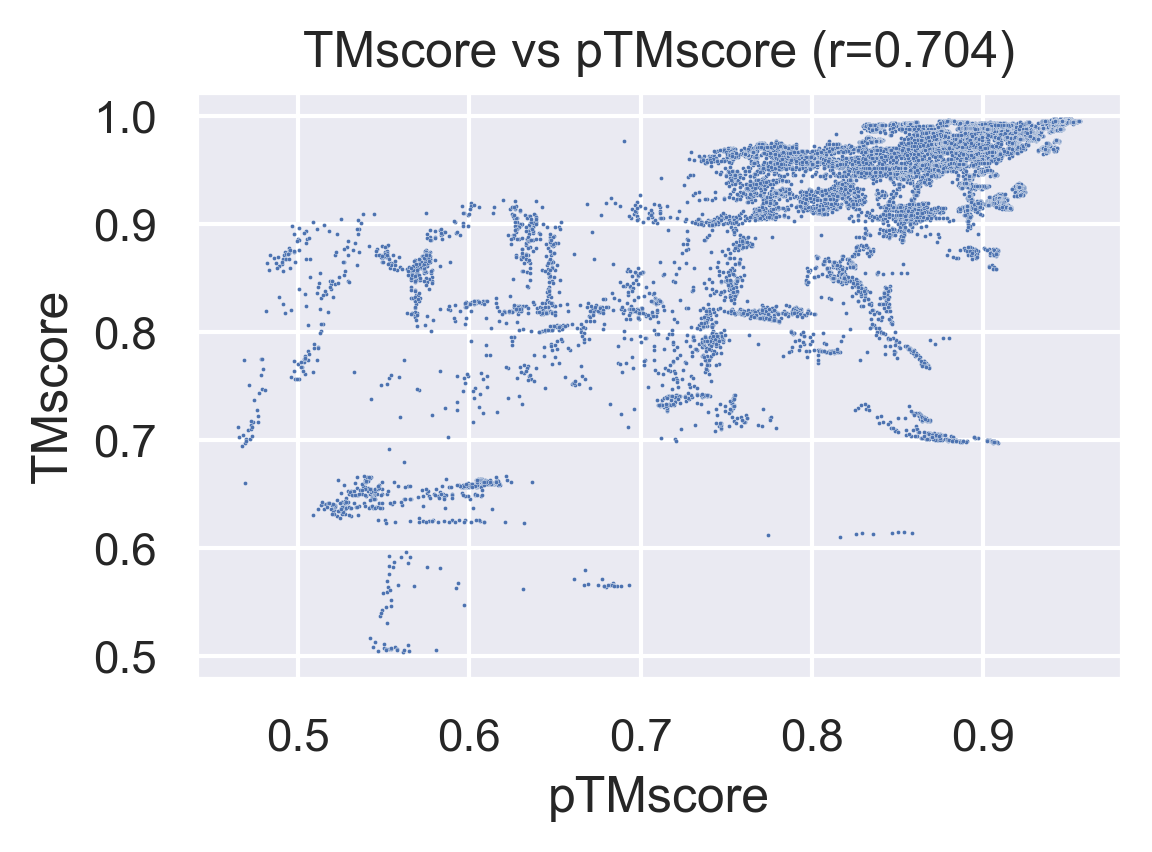

In [16]:
label = 'TMscore'
for method in methods:
    if method in ['DOPE', 'SOAP', 'SBROD']:
        continue
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=df, x=method, y=label, s=1)
    cc = df.corr()[label][method]
    plt.title(f'{label} vs {method} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

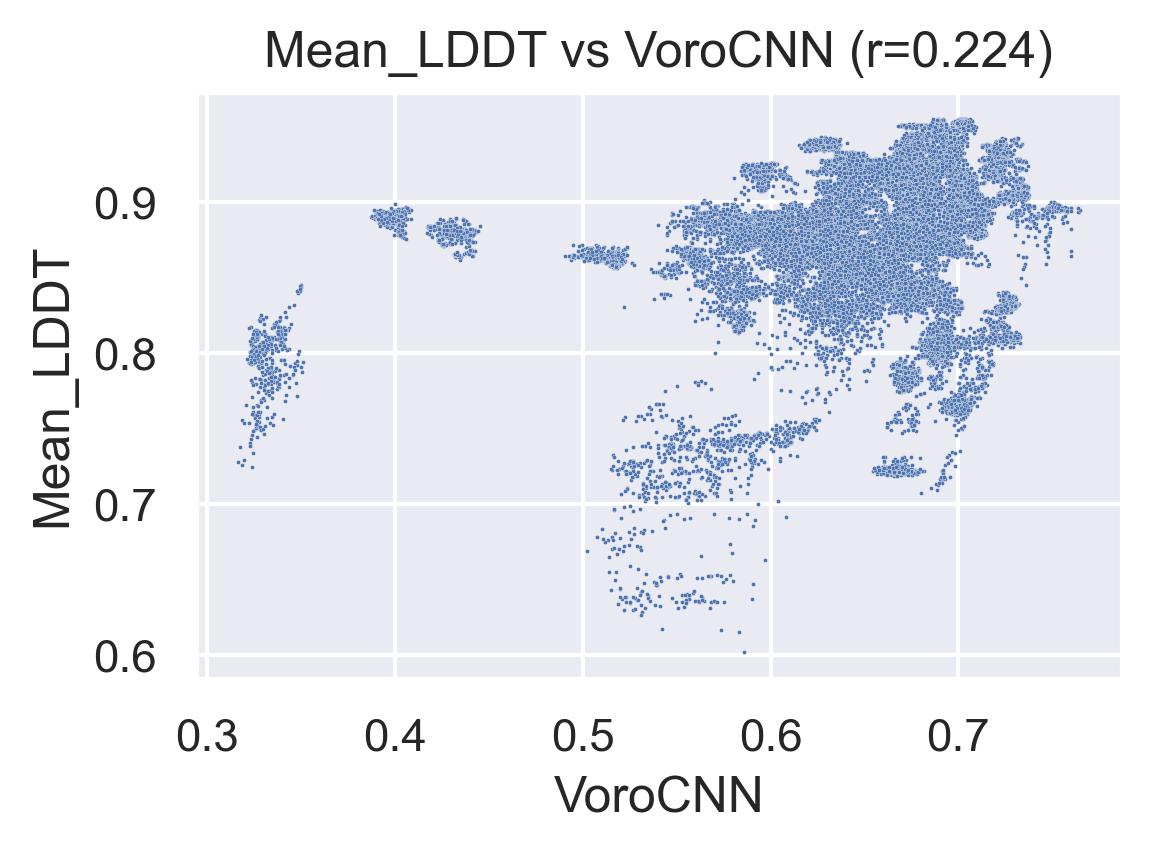

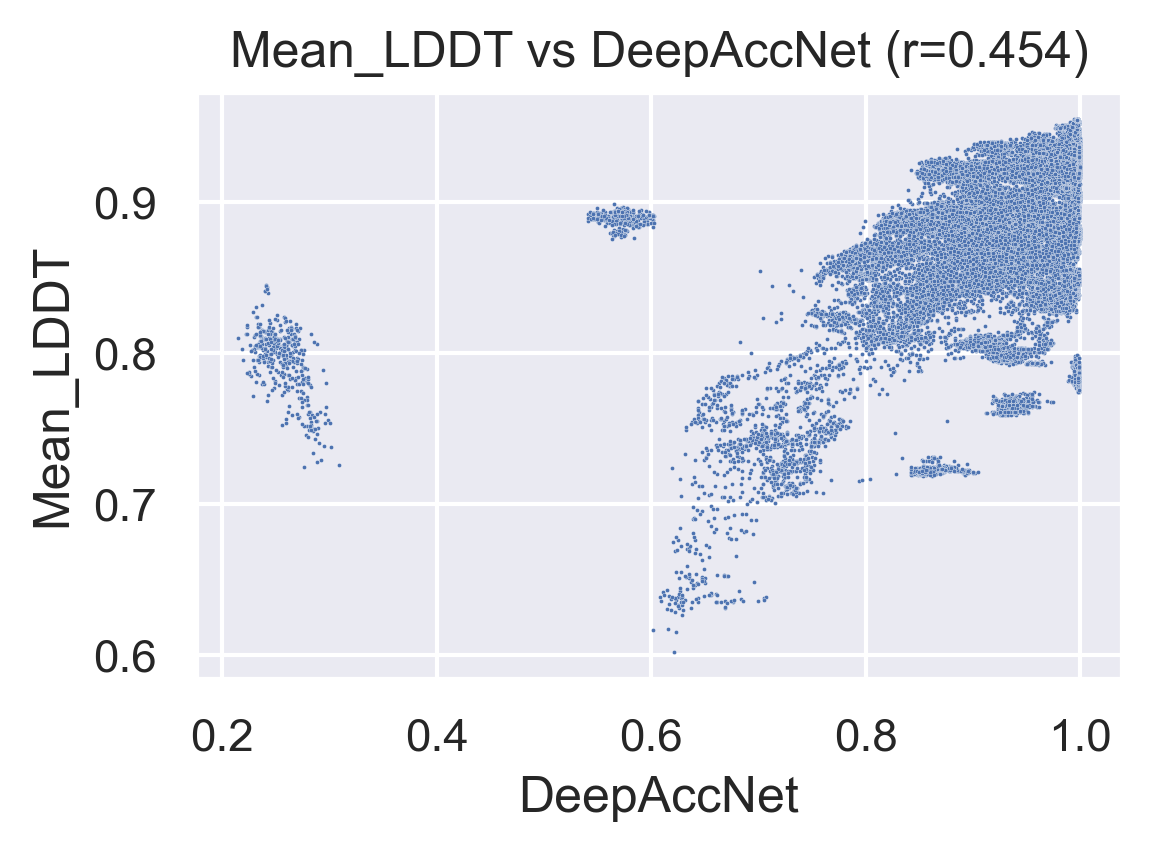

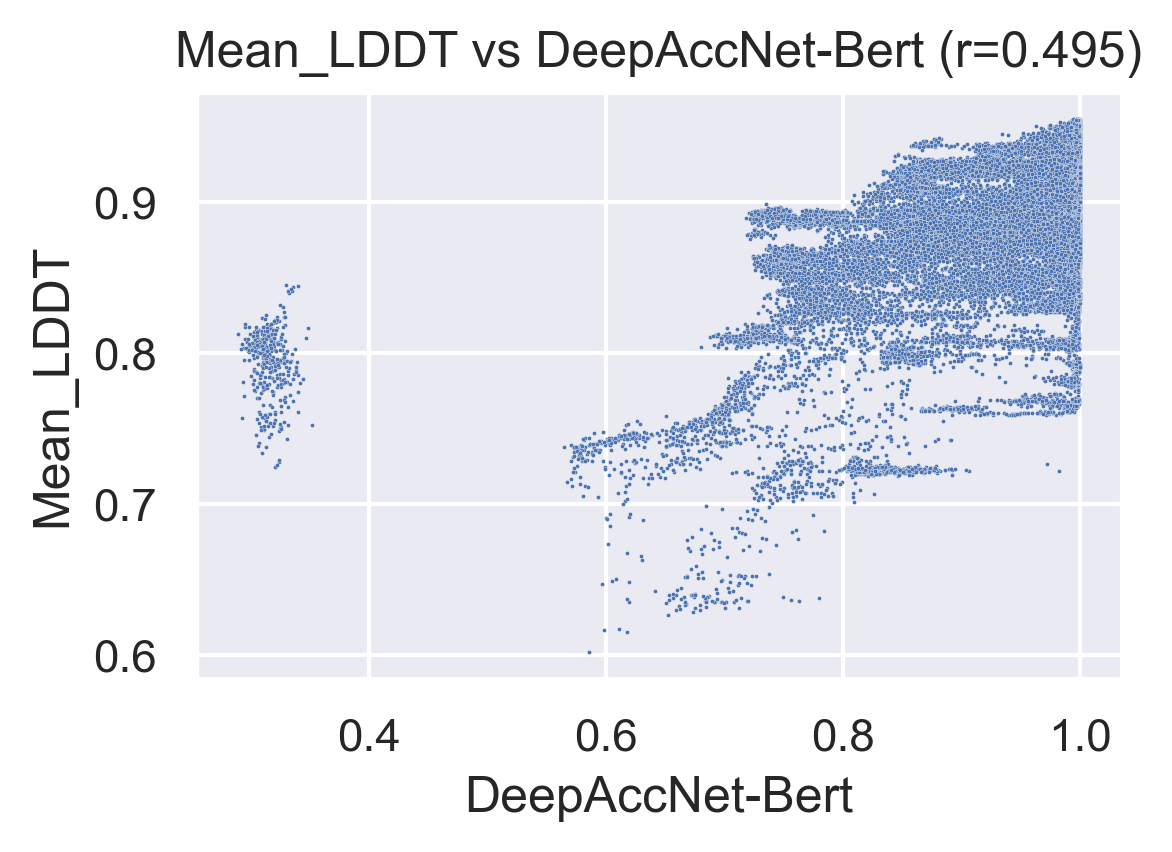

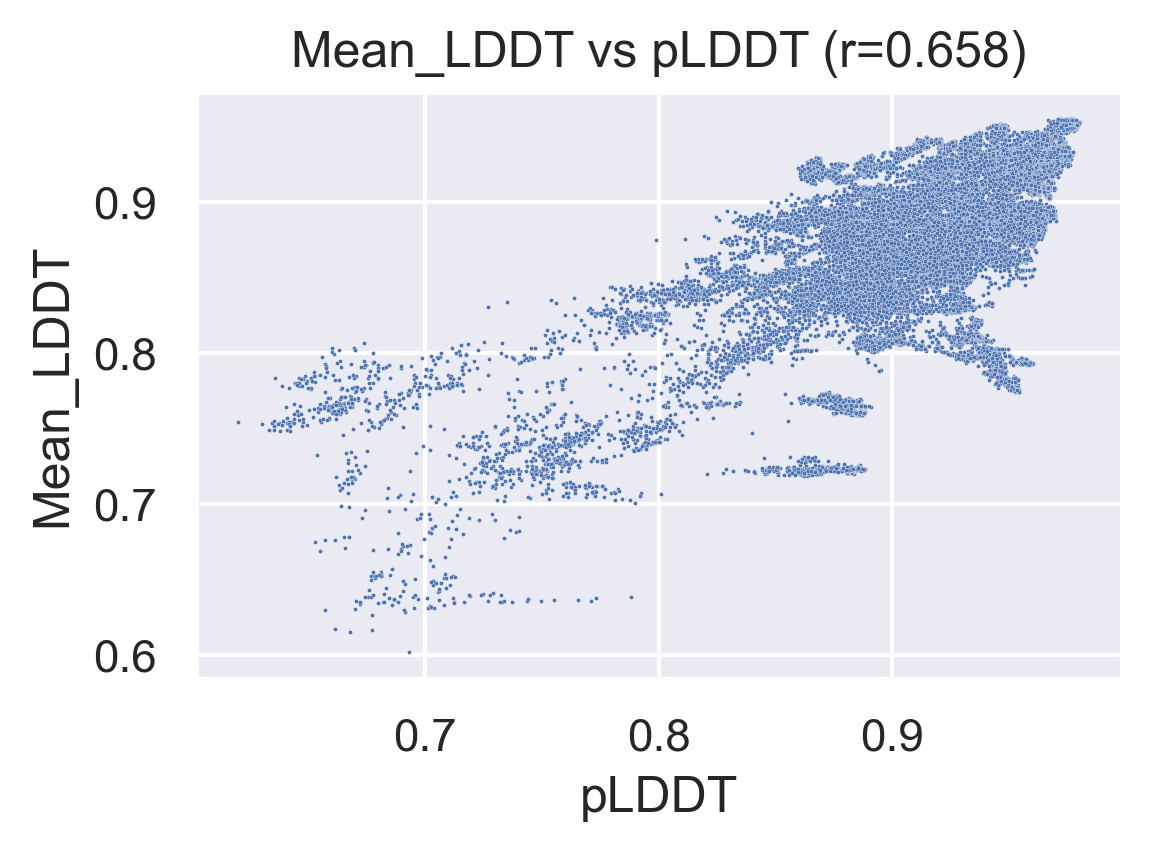

In [17]:
label = 'Mean_LDDT'
for method in methods:
    if method in ['DOPE', 'SOAP', 'SBROD']:
        continue
    plt.figure(figsize=(4, 3))
    sns.scatterplot(data=df, x=method, y=label, s=1)
    cc = df.corr()[label][method]
    plt.title(f'{label} vs {method} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()